## О проекте
<a id='target1'></a>

Чтобы скорректировать рекламный бюджет, коммерческий департамент сотового оператора хочет понять, какой тариф приносит больше денег. Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Персональные данные пользователей изменены из соображений конфиденциальности.

План проекта:
1. [ознакомление с файлами](#target2)
2. [предобработка](#target3)
3. [подготовка данных](#target4)
4. [анализ](#target5)
5. [что было сделано](#target6)

## Ознакомление с файлами
[к началу](#target1)
<a id='target2'></a>

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display
from math import ceil
%matplotlib inline
plt.rcParams['figure.facecolor'] = '#1c2423'

Данные о пятиста пользователях предоставлены в разных таблицах. Выведем информацию о них на экран, а также условия тарифов.

In [2]:
path = 'C:/Xozyain/Documents/Directory/Python_R/datasets/'
filename = ['tariffs.csv', 'users.csv', 'calls.csv', 'messages.csv', 'internet.csv']
df = []    
for i, filename in enumerate(filename, -1):
    if i == -1:
        display(pd.read_csv(path + filename))
        print()
    else:
        print('\n' * 2)
        print('{:_>20}'.format(filename.upper()))
        df.append(pd.read_csv(path + filename))
        display(df[i].head(3))
        print(df[i].info())
        print(df[i].describe())
        print('Уникальных пользователей:', (df[i]['user_id'].unique().shape[0]))
        if filename != 'users.csv':
            if df[i]['id'].is_unique:
                print("Значения в столбце 'id' уникальны")
            else:
                print("Значения в столбце 'id' неуникальны")

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra






___________USERS.CSV


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
Уникальных пользователей: 500



___________CALLS.CSV


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
Уникальных пользователей: 492
Значения в столбце 'id' уникальны



________MESSAGES.CSV


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
Уникальных пользователей: 426
Значения в столбце 'id' уникальны



________INTERNET.CSV


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB
None
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000
Уникальных пользователей: 497
Значения в столбце 'id' ун

- действительно, предоставлены данные о пятиста пользователях, но в таблице звонков фигурируют 493 пользователя, в таблице выходов в интернет 497, в таблице сообщений - 426. Нужно убедиться, что остальные пользователи услугой не пользовались (а не что-то другое)
- если неиспользованные услуги просто не регистрируются (да и в этих таблицах не обо всех пятиста пользователях собраны данные!), то откуда в столбце 'duration' датафрейма 'calls' и в столбце 'mb_used' таблицы 'internet' нули? 
- все необходимые для анализа данные вычисляются посредством группировки по мультииндексу 'user_id' > 'month'.
- в результирующем датафрейме нужно отформатировать столбцы (object перевести в category или datetime)
- дублей нет: значения столбцов 'id' во всех таблицах уникальны. но неявные дубли в названиях городов могут быть, стоит проверить.
- согласно документации, пропуски в 'churn_date' стоят там, где договор не был расторжен на момент выгрузки данных. Значит, пропуски можно заполнить нулём, так как в столбце с datetime ноль может появиться только как обозначение `weekday`, а извлекать `weekday` мы не собираемся.

Как обычно, первым делом отформатируем даты. Мы знаем, что данные о звонках, сообщениях, выходах в интернет и расторжениях договора собраны за один, 2018, год. Проверим, верно ли это так же для данных в столбце 'reg_date'.

In [3]:
pd.to_datetime(df[0]['reg_date'], format = '%Y-%m-%d').dt.year.value_counts()

2018    500
Name: reg_date, dtype: int64

Верно. Итак, поскольку год везде один, во всех столбцах формата datetime нас интересует только месяц. Номер месяца нужно извлечь. Все столбцы с датами заполнены в одном формате ГГГГ-ММ-ДД, но, к сожалению, имеют разные названия. Чтобы не вводить названия столбцов c названиями датафреймов вручную, попробуем применять функцию `to_datetime` ко всем столбцам типа object подряд.

In [4]:
for next_df in df:
    for column_name in next_df.select_dtypes(include = ['object']).columns:
        try:
            next_df[column_name] = pd.to_datetime(next_df[column_name], format = '%Y-%m-%d').dt.month
            print(next_df[column_name].value_counts(), end = '\n' * 2)
        except ValueError:
            pass

df[0]['churn_date'] = df[0]['churn_date'].fillna(0)

12.0    16
10.0     9
11.0     8
9.0      3
8.0      2
Name: churn_date, dtype: int64

4     53
8     50
10    45
7     44
1     43
11    42
5     41
6     40
2     39
12    36
9     35
3     32
Name: reg_date, dtype: int64

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: call_date, dtype: int64

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: message_date, dtype: int64

12    24799
11    21817
10    20009
9     17512
8     16092
7     13548
6     11057
5      9408
4      6511
3      4885
2      2641
1      1117
Name: session_date, dtype: int64



Согласно данным, компания с начала года в ~25 раз увеличила объём предоставляемых услуг для некоторых 500 пользователей. К счастью, в данных сразу же нашлось и объяснение этому феномену - число клиентов в этой выборке равномерно росло в течение года, и ни один из клиентов не был подключён к тарифу в 2017. Иначе пришлось бы разбираться, не стал ли кто-то из клиентов, понемногу набирая обороты, майнить криптовалюту или заниматься спам-рассылкой. 

Чтобы проверить на неявные дубли в названиях городов, самое эффективное - посмотреть на названия своими глазами.

In [5]:
print(df[0]['city'].unique())

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


Их нет. Значит, перейдём к основным вопросам предобработки.

## Вопросы об отсутствии данных и о нулевых значениях
[к началу](#target1)
<a id='target3'></a>

Выведем информацию о клиентах, о которых в одном из датафреймов нет данных. По знакомству с датафреймами стало понятно, что слишком много клиентов не фигурируют в таблице отправленных сообщений, поэтому вместо всего списка таких клиентов выведем только тех, кто и в других таблицах не представлен.

In [6]:
no_calls = df[0][ df[0]['user_id'].isin(df[1]['user_id']) == False ]
no_internet = df[0][ df[0]['user_id'].isin(df[3]['user_id']) == False ]
no_sms = df[0][ df[0]['user_id'].isin(df[2]['user_id']) == False ]

print(f'Нет данных о звонках ({no_calls.shape[0]} клиентов):')
display(no_calls)
print()
print(f'Нет данных о выходах в интернет ({no_internet.shape[0]} клиента):')
display(no_internet)
print()
print(f'Нет данных об смс ({no_sms.shape[0]} клиента), о звонках и выходах в интернет:')
display(no_sms[ no_sms['user_id'].isin(no_calls['user_id']) & no_sms['user_id'].isin(no_internet['user_id']) ])

Нет данных о звонках (8 клиентов):


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
91,1091,36,0.0,Набережные Челны,Вера,Суслова,5,ultra
106,1106,67,0.0,Калуга,Исаак,Костин,4,ultra
128,1128,51,12.0,Волжский,Ксения,Агаева,12,ultra
231,1231,63,0.0,Чебоксары,Касьян,Авдюков,5,ultra
328,1328,44,0.0,Мурманск,Рауль,Аркадьев,10,ultra
371,1371,50,12.0,Омск,Ириней,Трофимов,12,smart
473,1473,18,0.0,Красноярск,Николай,Лебедев,8,ultra
489,1489,35,0.0,Санкт-Петербург,Павел,Гончаров,8,smart



Нет данных о выходах в интернет (3 клиента):


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,12.0,Волжский,Ксения,Агаева,12,ultra
273,1273,46,0.0,Курган,Рэм,Корнилов,5,ultra
371,1371,50,12.0,Омск,Ириней,Трофимов,12,smart



Нет данных об смс (74 клиента), о звонках и выходах в интернет:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,12.0,Волжский,Ксения,Агаева,12,ultra
371,1371,50,12.0,Омск,Ириней,Трофимов,12,smart


Судя по тому, что никаких данных (ни о звонках, ни об смс, ни о выходах в интернет) нет только для тех клиентов, которые заключили и в том же месяце расторгли договор (Ксения из Волжского и Ириней из Омска), можно с уверенностью заключить (по методу индукции), что и для остальных клиентов отсутствие данных по использованию некоторой услуги вызвано не ошибкой, а именно тем, что они этой услугой не пользовались. 

Но тогда как объяснить нули в 'duration' (звонки по 0 секунд) и нули в 'mb_used' (выходы в интернет по 0 мб), при том что оператор, как было сказано, округляет эти значения в большую сторону? Посмотрим, округлены ли значения тех столбцов, где, среди прочего, есть нули.

In [7]:
display(df[1][ (df[1]['duration'] > 0) & (df[1]['duration'] < 1) ].head(3))
display(df[3][ (df[3]['mb_used'] > 0) & (df[3]['mb_used'] < 1) ].head(3))

,id,call_date,duration,user_id
55,1000_55,9,0.31,1000
65,1000_65,10,0.34,1000
97,1000_97,10,0.33,1000


,Unnamed: 0,id,mb_used,session_date,user_id
1379,1379,1006_10,0.86,12,1006
1593,1593,1006_224,0.93,3,1006
5229,5229,1015_237,0.41,6,1015


Несколько соображений:
- Оператор, очевидно, хоть и рассчитывает плату с округлением, но округлённое значение не заносит в базу данных: имеется непрерывное множество значений в промежутке между натуральными числами, в том числе между 0 и 1.
- Если бы услугой не воспользовались, то данные не были бы зарегистрированы в базе данных. Как мы убедились выше, оператор не регистрирует в базе данных не-совершённые звонки, не-отправленные сообщения и не-начатые сеансы. Кроме того, это видно по тому, насколько сильно отличается количество строк в датафеймах: если бы, например, данные обновлялись раз в сутки, то и в датафреймах было бы одинаковое количество строк - по числу суток. Следовательно, в строчках с нулями имели место и звонок, и выход в интернет.

Округлим значения вверх, как это делал оператор, выставляя счёт за свои услуги. Нули останутся нулями, а остальные значения примут такой вид, что впоследствии можно будет легко рассчитать плату за тариф.

In [8]:
df[1]['duration'] = df[1]['duration'].apply(ceil)
df[3]['mb_used'] = df[3]['mb_used'].apply(ceil)
print("Строк с нулями в 'duration' {:.1%} от общего числа".format(df[1][ df[1]['duration'] == 0]
                                                                  .shape[0] / df[1].shape[0]))
print("Строк с нулями в 'mb_used' {:.1%} от общего числа".format(df[3][ df[3]['mb_used'] == 0]
                                                                 .shape[0] / df[3].shape[0]))

Строк с нулями в 'duration' 19.6% от общего числа
Строк с нулями в 'mb_used' 13.1% от общего числа


Скорее всего, проблема с нулями актуальна лишь для некоторой группы клиентов. Но для какой? Построим по два графика зависимости: на одном на ось Х положим id, на другом - месяц. На оси У будет доля нулей от всех значений. 

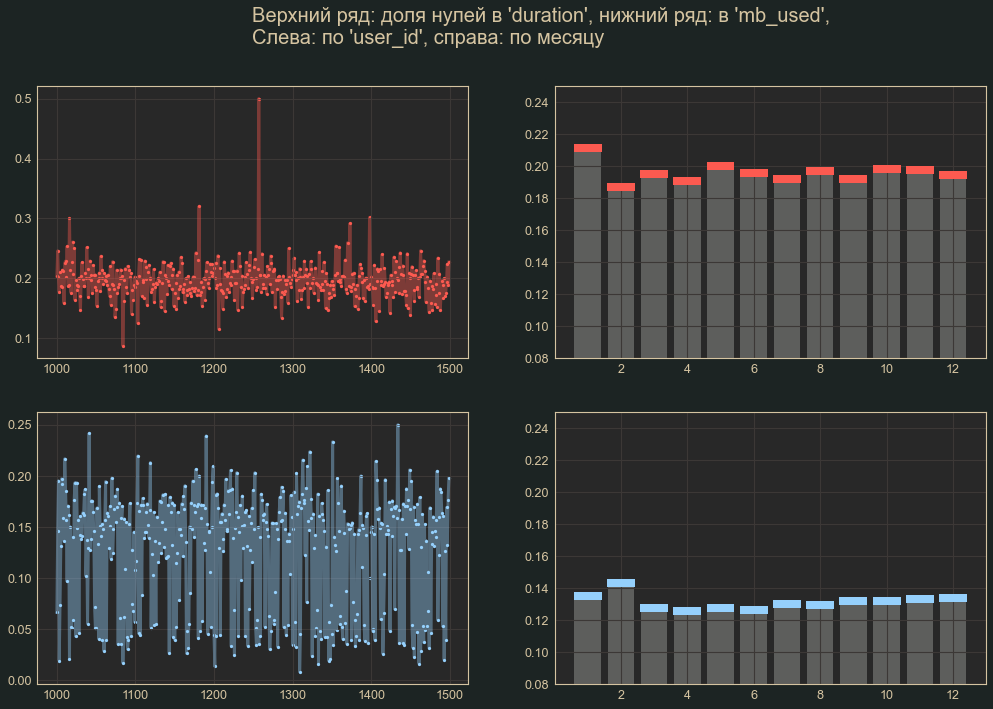

In [9]:
dic = { 'duration': ['user_id', 'call_date', 1, '#fc5a50'],
        'mb_used': ['user_id', 'session_date', 3, '#95d0fc'] }

fig, ax = plt.subplots(2, 2, figsize = (17, 11))
fig.suptitle("Верхний ряд: доля нулей в 'duration', нижний ряд: в 'mb_used',\nСлева: по 'user_id', справа: по месяцу", 
             fontsize = 20, ha = 'left', x = 0.3)
for ax_num, (column, val) in enumerate(dic.items()):
    fir = (df[val[2]].loc[ df[val[2]][column] == 0, val[0]].value_counts()
                               .div(df[val[2]][val[0]].value_counts()))
    sec = (df[val[2]].loc[ df[val[2]][column] == 0, val[1]].value_counts()
                               .div(df[val[2]][val[1]].value_counts())
                               .sort_index())
    ax[ax_num][0].plot(fir.index, fir, color = val[3], alpha = 0.4, linewidth = 3)
    ax[ax_num][0].scatter(fir.index, fir, s = 3, linewidths = 1.5, c = val[3], edgecolors = val[3])
    ax[ax_num][1].set_ylim(0.08, 0.25)
    for i in range(1, 13):
        ax[ax_num][1].bar(i, sec[i], color = '#929591', alpha = 0.5, width = 0.8)
        ax[ax_num][1].add_line(mlines.Line2D([i -0.3, i +0.3], 
                                             [sec[i], sec[i]], 
                                             color = val[3], linewidth = 8, alpha = 1))

Разброс доли нулей в пределах 20% для клиентов и в пределах 5% для месяцев. Ни одного клиента и месяца без нулей нет, а также нет никакой группы значений, для которых количество нулей было бы значительно выше или ниже среднего (максимум, что можно допустить - 20% разницы для разных групп клиентов). Это говорит об отсутствии аномалии. А это, в свою очередь, означает, что какая-бы причина не скрывалась за нулями, их присутствие чем-то оправдано.

Теперь встаёт практический вопрос: нужны ли они нам? С одной стороны, нули фиксируют некую активность пользователей (хотя мы не знаем какую). С другой стороны, от них нет дохода. Я пытаюсь представить, какие метрики могут исказить нулевые значения: месячное количество звонков и выходов в интернет, средняя продолжительность звонка или выхода в интернет, средняя выручку с одного звонка или одного выхода в интернет сверх тарифного пакета - но мы таких вычислений производить не будем. Судя по всему, нули в этом проекте не помешают, но и большой важностью не обладать не будут, поэтому предлагаю оставить их. 

## Расчёт данных и создание единой таблицы
[к началу](#target1)
<a id='target4'></a>

Установим индексы - значения столбца 'user_id'. Установим двухуровневую индексацию столбцов, чтобы в дальнейшем беспроблемно присоедининять столбцы с такой же двухуровневой индексацией.

In [10]:
df[0] = df[0].set_index('user_id')
df[0].columns = pd.MultiIndex.from_product([['client_info'], df[0].columns], names = ['section', 'params'])

Два столбца с именами можно объединить, чтобы обращаться за именем к одному объекту, а не двум. 

In [11]:
df[0][('client_info', 'name')] = df[0][('client_info', 'first_name')].add(' ').add(df[0][('client_info', 'last_name')])
df[0] = df[0].drop([('client_info', 'last_name'), ('client_info', 'first_name')], axis = 1)

Добавляем к информации о каждом пользователе данные о том, как он пользовался тарифом в течение года. Используем `zip()` и `pivot_table()` для получения нужных данных из нескольких файлов, а посредством `concat( )` склеиваем столбцы по индексам, при этом первый и второй уровни столбцов объединяются соответственно. В строках 'user_id', которые отсутствовали в группировке, после объединения появятся пропуски: так как мы убедились, что клиенты не пользовались соответствующей услугой - пропуски можно сразу заполнить нулями. 

Записываем в переменную `df` результирующий датафрейм.

In [12]:
for column, values, aggfunc, label, next_df in zip(['call', 'message', 'session'], 
                                                   ['duration', 'id', 'mb_used'],
                                                   ['sum', 'count', 'sum'],
                                                   ['minutes_spent', 'messages_sent', 'megabytes_used'],
                                                   df[1:]):
    
    pivot_temp = (next_df.pivot_table(index = 'user_id', 
                                      columns = column + '_date', 
                                      values = values, 
                                      aggfunc = aggfunc).fillna(0))
    pivot_temp.columns = pd.MultiIndex.from_product([[label], pivot_temp.columns])
    df[0] = pd.concat([df[0], pivot_temp], axis = 1).fillna(0)

df = df[0]

После `aggfunc( )` все целочисленные значения стали дробными с .0 в десятичной части, но их можно без труда перевести обратно в int, заодно передав параметр `downcast`. Cтолбцы типа 'object' (кроме 'name'), содержат категориальные переменные: их можно для экономии памяти и для быстродействия переформатировать в формат 'category'.

In [13]:
for column_name in df.select_dtypes(include = ['float64', 'integer']).columns:
    df[column_name] = pd.to_numeric(df[column_name].astype('int'), downcast = 'signed') 
for column_name in df.select_dtypes(include = ['object']).columns:
    if column_name != ('client_info', 'name'):
        df[column_name] = df[column_name].astype('category')

Напишем функцию, которая сможет, проитерировавшись по строчкам df, посчитать помесячную прибыль от каждого клинта. Данные соберём в свобдной таблице `revenue_tab`, затем присоединим к основной таблице. 

In [14]:
params_columns = list(range(1, 13))
revenue_tab = pd.DataFrame(index = df.index, 
                           columns = pd.MultiIndex.from_product([['revenue'], params_columns]))

def calculating_revenue(row):
    global revenue_tab
    
    for i in np.arange(1, 13):
        if i >= row[('client_info', 'reg_date')]:
            if (row[('client_info', 'churn_date')] != 0) and (i >= row[('client_info', 'churn_date')]):
                revenue_tab.loc[row.name, ('revenue', i)] = 0 
                continue  

            if row[('client_info', 'tariff')] == 'smart':
                extra_min = max((row[('minutes_spent', i)] - 500), 0)
                extra_sms = max((row[('messages_sent', i)] - 50), 0)
                extra_mb = max((row[('megabytes_used', i)] - (15 * 1024)), 0)
                revenue_tab.loc[row.name, ('revenue', i)] = (550 + (extra_min * 3) 
                                                              + (extra_sms * 3) + (ceil(extra_mb / 1024) * 200))

            elif row[('client_info', 'tariff')] == 'ultra':
                extra_min = max((row[('minutes_spent', i)] - 3000), 0)
                extra_sms = max((row[('messages_sent', i)] - 1000), 0)
                extra_mb = max((row[('megabytes_used', i)] - (30 * 1024)), 0)
                revenue_tab.loc[row.name, ('revenue', i)] = (1950 + (extra_min * 1) 
                                                              + (extra_sms * 1) + (ceil(extra_mb / 1024) * 150))
        else:
            revenue_tab.loc[row.name, ('revenue', i)] = 0 
        
               
df.apply(calculating_revenue, axis = 1)
df = pd.concat([df, revenue_tab.astype('int')], axis = 1)

Чтобы увидеть, что получилось в итоге, выведем случайные три строки и поменяем местами строки вывода со столбцами.

In [15]:
df.sample(3).T

user_id                              1067                 1092           1063
section        params                                                        
client_info    age                     45                   73             45
               churn_date               0                    0             12
               city                Москва               Ижевск           Тула
               reg_date                 4                    6              4
               tariff               smart                smart          ultra
               name        Юзефа Абашкина  Вениамин Амельченко  Таира Климова
minutes_spent  1                        0                    0              0
               2                        0                    0              0
               3                        0                    0              0
               4                      387                    0            581
               5                      480                    0            716
               6                      633                  212            815
               7                      383                  421            852
               8                      386                  411            864
               9                      554                  258            820
               10                     491                  470            985
               11                     477                  439            896
               12                     390                  295            231
messages_sent  1                        0                    0              0
               2                        0                    0              0
               3                        0                    0              0
               4                       47                    0              0
               5                       73                    0              0
               6                       59                   22              0
               7                       63                   63              0
               8                       50                   78              0
               9                       47                   56              0
               10                      64                   51              0
               11                      68                   70              0
               12                      78                   59              0
megabytes_used 1                        0                    0              0
               2                        0                    0              0
               3                        0                    0              0
               4                     9817                    0          17075
               5                    15318                    0          21568
               6                    12299                 7985          20700
               7                     5785                24997          20288
               8                    13583                16974          13881
               9                    12776                24123          25815
               10                   12497                24312          14206
               11                   13122                26019          14799
               12                   13164                24789           5584
revenue        1                        0                    0              0
               2                        0                    0              0
               3                        0                    0              0
               4                      550                    0           1950
               5                      619                    0           1950
               6                      976                  550           1950
               7                      589                 2589           1950
               8      

## Анализ
[к началу](#target1)
<a id='target5'></a>

Заказчика интересуют четыре категории пользователей:
- клиенты с одного тарифа и клиенты с другого
- москвичи и не москвичи

И его интересует характерные отличия между этими группами (попарно) по нескольким критериям:
1. сколько минут разговора тратят 
2. сколько сообщений отправляют
3. сколько пользуются интернетом
4. какую прибыль приносят


In [16]:
smart = df[ df[('client_info', 'tariff')] == 'smart' ]
ultra = df[ df[('client_info', 'tariff')] == 'ultra' ]
moscow = df[ df[('client_info', 'city')] == 'Москва' ]
not_moscow = df[ df[('client_info', 'city')] != 'Москва' ]
print('Размеры групп:', f'\tsmart: {smart.shape[0]}', f'\tultra: {ultra.shape[0]}', f'\tmoscow: {moscow.shape[0]}', f'\tnot_moscow: {not_moscow.shape[0]}', sep = '\n')

Размеры групп:
	smart: 351
	ultra: 149
	moscow: 99
	not_moscow: 401


Для ответа на вопросы будем строить гистограммы плотности вместо гистограмм частотности: так как группы не равны по размерам, частотность будет не к месту, хотя и по ней можно было бы судить о распределении. По этой же причине не станем сравнивать тарифы в абсолютных цифрах.

Все клиенты присоединились к оператору в течение года, поэтому у каждого из них часть месяцев будет заполнена нулями. Чтобы исключив эти месяцы, перед приенением `to_list()` нули можно заменить на пропуски, а от пропусков избавиться методом `dropna()`. Помесячные метрики мы не будем усреднять для каждого пользователя: во-первых, это в негативную сторону скажется на количестве наблюдений, для которых строится гистограмма и делается анализ. А, во-вторых, усреднив данные, мы бы укоротили хвосты гистограммы, получили бы специфические среднее и дисперсию и не увидели бы реальную картину (но приближенную к ней).

In [232]:
def distr_comparison(slice_1, slice_2, label_1, label_2, col_1 = '#ffffd4', col_2 = '#fac205', no_limits = True):

    dic = { 'minutes_spent': ['Ожидаемая месячная потребность в минутах разговора', 500, 3000, False],
            'messages_sent': ['Ожидаемое месячное количество отправленных сообщений', 50, 1000, False],
            'megabytes_used': ['Ожидаемая месячная потребность в мегабайтах трафика', 15360, 30720, False],
            'revenue': ['Ожидаемая месячная выручка с клиента', 550, 1950, True]}

    
    fig, ax = plt.subplots(ncols = 1, nrows = 4, figsize = (10, 22))

    for (col, val), ax in zip(dic.items(), ax.flatten()):

        smart_mean = []
        # код был написан для сравнения тарифов, а потом превращён в функцию. поэтому 
        # два распределения в теле функции называются smart и ultra
        for i in range (1, 13):
            smart_mean.append(slice_1[(col, i)].replace(0, np.nan).dropna().to_list())
        smart_mean = [j for i in smart_mean for j in i]
        sm_mu = np.mean(smart_mean)
        sm_std = np.std(smart_mean)
        ax.hist(smart_mean, 35, density = True, stacked = True,
                alpha = 0.5, color = col_1, zorder = 3,
                label = f"{label_1}:\n       μ = {int(sm_mu)}, σ = {int(sm_std)}")
        array_of_dots = np.linspace(min(smart_mean), max(smart_mean), 100)
        ax.plot(array_of_dots, 
                st.norm.pdf(array_of_dots, sm_mu, sm_std), 
                '--', linewidth = 5, color = col_1, alpha = 0.3, zorder = 4)
        if val[3] == True:
            ax.set_ylim(ymax = ax.get_ylim()[1] * 0.33)
            ax.set_xlim(xmin = 540, xmax = 5000)
        else: 
            ax.set_xlim(xmin = 0)


        ultra_mean = []
        for i in range (1, 13):
            ultra_mean.append(slice_2[(col, i)].replace(0, np.nan).dropna().to_list())
        ultra_mean = [j for i in ultra_mean for j in i]
        ult_mu = np.mean(ultra_mean)
        ult_std = np.std(ultra_mean)
        ax.hist(ultra_mean, 25, density = True, stacked = True, 
                alpha = 0.5, color = col_2, zorder = 1,
                label = f"{label_2}:\n       μ = {int(ult_mu)}, σ = {int(ult_std)}")
        array_of_dots = np.linspace(min(ultra_mean), max(ultra_mean), 100)
        ax.plot(array_of_dots, 
                st.norm.pdf(array_of_dots, ult_mu, ult_std), 
                '--', linewidth = 5, color = col_2, alpha = 0.3, zorder = 2)

        if not no_limits:
            ax.vlines([], [], [], linewidth = 2.5, color = col_1, label = 'граница пакета\nв тарифе', alpha = 0.3)
            if max(smart_mean) < val[1]:
                ax.text((ax.get_xlim()[1] * 0.95), (ax.get_ylim()[1] * 0.8), 
                        f"p( {label_1}.max > {val[1]} ) ~ 0", ha = 'right', color = col_1, fontsize = 15)
            else:
                ax.vlines(x = val[1], ymin = 0, ymax = ax.get_ylim()[1] * 0.1, linewidth = 5, color = col_1, zorder = 5)
            if max(ultra_mean) < val[2]:
                ax.text((ax.get_xlim()[1] * 0.95), (ax.get_ylim()[1] * 0.9), 
                        f"p( {label_2}.max > {val[2]} ) ~ 0", ha = 'right', color = col_2, fontsize = 15)
            else:
                ax.vlines(x = val[2], ymin = 0, ymax = ax.get_ylim()[1] * 0.1, linewidth = 5, color = col_2, zorder = 6)


        ax.tick_params(labelleft = False)
        ax.set_title(val[0], fontsize = 20)  
        ax.plot([], [], '--', linewidth = 2.5, color = col_1, label = 'нормальное распределение\nс такими же параметрами')  
        ax.legend(bbox_to_anchor = (1.5, 0.8), fontsize = 'x-large')

    display(fig)
    plt.close(fig)

Напишем функцию, которая будет подготавливать аргументы и тестировать гипотезы о равенстве выборочных средних в интересующих нас столбцах.

In [235]:
def executing_ttest_ind(df_1, df_2):
    for col in ['minutes_spent', 'messages_sent', 'megabytes_used', 'revenue']:
        array_for_ttest_df1 = []
        array_for_ttest_df2 = []
        
        for i in range (1, 13):
            array_for_ttest_df1.append(df_1[(col, i)].replace(0, np.nan).dropna().to_list())
            array_for_ttest_df2.append(df_2[(col, i)].replace(0, np.nan).dropna().to_list())
            
        array_for_ttest_df1 = [j for i in array_for_ttest_df1 for j in i]
        array_for_ttest_df2 = [j for i in array_for_ttest_df2 for j in i]
        
        result = st.ttest_ind(array_for_ttest_df1, array_for_ttest_df2, equal_var = True).pvalue
        
        if (result != 0) and (result != 1):
            print(f"Вероятность, что различие между выборками в столбце {col} было получено случайно и средние равны:", 
                  round(result, 2))
        else:
            print('Ошибка - результат равен нулю или единице')

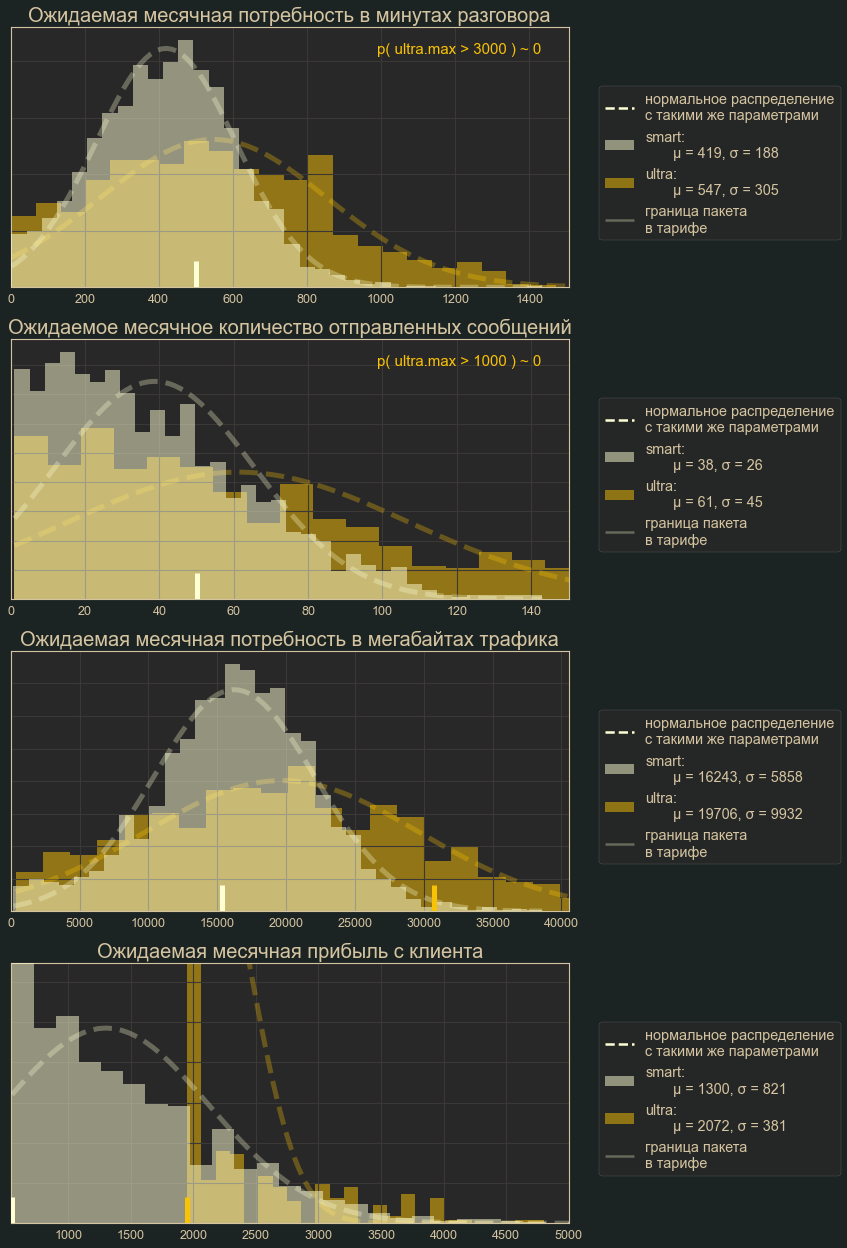

In [233]:
distr_comparison(smart, ultra, 'smart', 'ultra', no_limits = False)
executing_ttest_ind(smart, ultra)

Любопытно, с какой вероятностью случайно взятому клиенту тарифа 'smart' стоит задуматься о смене тарифа? Какова вероятность того, что его средняя ежемесячная плата будет превышать 1950 рублей (стоимость пакета 'ultra')? Посчитаем по выборке и посчитаем по нормальному распределению с такими же параметрами:

In [241]:
smart_mean = []
for i in range (1, 13):
    smart_mean.append(smart[('revenue', i)].replace(0, np.nan).dropna().to_list())
smart_mean = [j for i in smart_mean for j in i]
distr = st.norm(np.mean(smart_mean), np.std(smart_mean))
print('По нормальному распределению: ', round((distr.sf(1950)) * 100, 2), '%', sep = '')
print('По данной выборке: ', round(len([x for x in smart_mean if x >= 1950])/len(smart_mean) * 100, 2), '%', sep = '')

По нормальному распределению: 21.48%
По данной выборке: 21.43%


Сделаем несколько выводов:
- "хвосты" у распределения потребностей (шесть первых гистограмм) становятся толще по мере приближения к нулю. Похоже, что это - участь любого распределения, когда фиксируется не только активность субъектов, но и их не-активность

- потребность в минутах и потребность в мегабайтах распределены, за исключением "хвостов", нормально. Распределение всех потребностей у клиентов на тарифе 'ультра' на гистограммах более "вытянутое", и пик ниже. Иначе говоря, клиенты на тарифе "ультра" менее предсказуемые, и хотя в среднем используют больше минут и мегабайт, чем клиенты со "смарта", вполне с ними сопоставимы: кажется, что если бы клиентам на 'смарт' подняли тарифный пакет до уровня 'ультра', их распределение вытянулась бы также. Поэтому не похоже, чтобы тарифом 'ультра' пользовались люди, испытывающие острую необходимость в большом тарифном пакете

- клиенты на тарифе 'ультра' не выбирают включённый в тарифную плату пакет (за исключением интернета - в ~15% случаев). А клиентам на тарифе 'смарт' их пакета недостаточно: средняя выручка с клиента на 'смарт'е в два с половиной раза превышает стоимость самого пакета. В итоге одни платят за то, чем не пользуются, а другие переплачивают за то, чем пользуются. Предложение оператора хорошо сбалансировано, чтобы приносить доход оператору

- Напомню, в нашей выборке 351 человек подключены к тарифу 'смарт', а 149 - к 'ультра'. На одного клиента 'ультра', приносящего в среднем 2072 рубля в месяц, приходится 2.35 клиента 'смарт', приносящие в сумме 3062 рубля в месяц. Если ограничить анализ теми данными, которые есть, тариф 'смарт' оператору выгоднее

- любопытно, что нулевое значение в минутах разговора встречается чаще, чем нулевое значение в мегабайтах трафика. Мобильный интернет - более востребованная услуга, чем телефония.


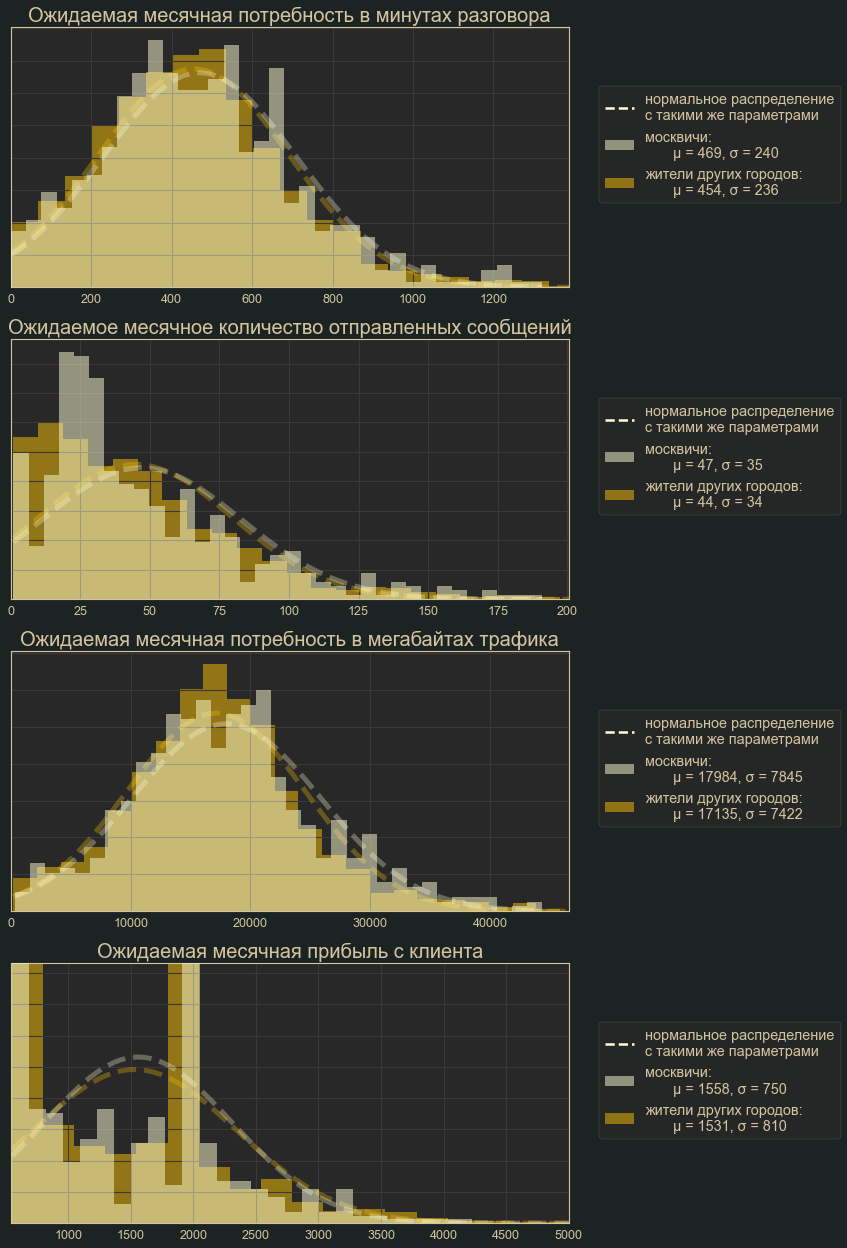

Вероятность, что различие между выборками в столбце minutes_spent было получено случайно и средние равны: 0.16
Вероятность, что различие между выборками в столбце messages_sent было получено случайно и средние равны: 0.2
Вероятность, что различие между выборками в столбце megabytes_used было получено случайно и средние равны: 0.01
Вероятность, что различие между выборками в столбце revenue было получено случайно и средние равны: 0.45


In [237]:
distr_comparison(moscow, not_moscow, 'москвичи', 'жители других городов', no_limits = True)
executing_ttest_ind(moscow, not_moscow)

Несколько выводов:
- выручка с клиента из Москвы практически не отличается от выручки клиента из другого города, и, судя по результатам теста на равенство выборочных средних, нет оснований предполагать, что в генеральной совокупности может быть по-другому
- ниже порога значимости в 5% (и близко к порогу значимости в 1%) только гипотеза о равенстве выборочных средних в столбце 'megabytes_used'. Отклоняем эту гипотезу, и тогда получается, что интернетом москвичи и жители других городов всё-таки пользуются по-разному. Хотя по гистограммме различий не видно, цифры говорят, что в среднем москвичам требуется примерно на один гигабайт трафика в месяц больше, чем жителям других городов

## Резюме
<a id='target6'></a>

Выполнение проекта состояло из следующих этапов:
1. Прочитали данные из файлов и составили план предобработки
2. Исследовали, за какой период сделана выборка
3. Выдвинули предположение о том, что означает отсутствие клиента в одном из датафреймов
4. Определились с отношением к нулевым значениям в столбце, содержащем длительности звонка и в столбце, содержащим истраченные за сеанс мегабайты трафика
5. Объединили таблицы в один объект
6. Рассчитали выручку с каждого пользователя
7. Разбили клиентов на категории и построили гистограммы распределения
8. Проверили несколько гипотез на равенство выборочных средних.

[к началу](#target1)